In [1]:
from pandas import read_csv, concat
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot as plt
import xgboost as xgb
import numpy as np
import pandas as pd

In [2]:
train_full = read_csv('./csv/train.csv')
y_train = train_full.SalePrice.values.astype(int)

In [3]:
# utilisation de fillna pour changer toutes les valeurs nan d'une colonne en 0
train_full['Alley'] = train_full['Alley'].fillna("none")
train_full['FireplaceQu'] = train_full['FireplaceQu'].fillna("none")
train_full['PoolQC'] = train_full['PoolQC'].fillna("none")
train_full['Fence'] = train_full['Fence'].fillna("none")
train_full['MiscFeature'] = train_full['MiscFeature'].fillna("none")

train_full = train_full.fillna(0)

del train_full['SalePrice']
del train_full['Id']

In [4]:
# différenciation catégorielle / quantitative
cat = train_full.select_dtypes(include=['object'])
x_quant = train_full.select_dtypes(exclude=['object'])
x_cat = pd.get_dummies(cat)

In [5]:
x_train = pd.concat([x_cat, x_quant], axis=1)

In [6]:
xgb = XGBRegressor()

lin_reg = xgb.fit(x_train, y_train)

[13:11:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [7]:
var_gain = xgb.get_booster().get_score(importance_type='gain')
var_gain

{'OverallQual': 612323461371.5,
 'GrLivArea': 78368784141.97058,
 'LandContour_Bnk': 40563618477.77778,
 'GarageCars': 318172636385.7143,
 'TotalBsmtSF': 71816211061.41936,
 '1stFlrSF': 43225257943.888885,
 'CentralAir_N': 45355788300.0,
 'BsmtFinSF1': 42248372161.942856,
 '2ndFlrSF': 41854627058.64,
 'FireplaceQu_none': 59695935572.0,
 'FullBath': 383953928000.0,
 'KitchenAbvGr': 114810683000.0,
 'Alley_none': 44080037900.0,
 'MSZoning_RM': 52462419950.0,
 'BsmtQual_Ex': 289902362666.6667,
 'YearBuilt': 23062287944.583332,
 'LotArea': 15958178056.8,
 'YearRemodAdd': 42348081620.76923,
 'GarageType_Attchd': 56538800150.0,
 'KitchenQual_TA': 40458256400.0,
 'ExterQual_TA': 431983690000.0,
 'GarageYrBlt': 13081254872.0,
 'Neighborhood_Edwards': 11056718062.857143,
 'OverallCond': 10699428009.642857,
 'Condition1_Norm': 11604144398.571428,
 'BsmtExposure_Gd': 22181806405.714287,
 'MSZoning_RL': 13156988627.333334,
 'KitchenQual_Ex': 56892942445.0,
 'KitchenQual_Gd': 117765702000.0,
 'Sale

In [8]:
var_order = sorted(var_gain, key=lambda colonnes: colonnes[1])
var_order

['MSZoning_RM',
 'MSZoning_RL',
 'MSSubClass',
 'MSZoning_C (all)',
 'MSZoning_RH',
 'MSZoning_FV',
 'LandContour_Bnk',
 'GarageCars',
 'GarageType_Attchd',
 'GarageYrBlt',
 'SaleType_WD',
 'GarageArea',
 'SaleType_New',
 'SaleCondition_Partial',
 'LandContour_HLS',
 'SaleCondition_Abnorml',
 'MasVnrType_None',
 'PavedDrive_N',
 'HalfBath',
 'SaleCondition_Family',
 'GarageQual_TA',
 'MasVnrType_BrkFace',
 'GarageFinish_RFn',
 'MasVnrArea',
 'LandSlope_Gtl',
 'LandContour_Low',
 'GarageType_CarPort',
 'ScreenPorch',
 'CentralAir_N',
 'YearBuilt',
 'YearRemodAdd',
 'Neighborhood_Edwards',
 'Neighborhood_Crawfor',
 'HeatingQC_Fa',
 'Neighborhood_NAmes',
 'Neighborhood_StoneBr',
 'HeatingQC_TA',
 'HeatingQC_Gd',
 'Neighborhood_NWAmes',
 'Neighborhood_ClearCr',
 'HeatingQC_Ex',
 'Fence_GdWo',
 'Neighborhood_Somerst',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_NoRidge',
 'FireplaceQu_none',
 'KitchenAbvGr',
 'KitchenQual_TA',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'Fir

In [9]:
X_train = x_train[['MSZoning_RM', 'LandContour_Bnk', 'GarageCars', 'GarageType_Attchd', 'GarageYrBlt']]

In [10]:
X_train.shape[1:]

(5,)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Input(shape=X_train.shape[1:]))
model.add(Dense(1))

In [12]:
from tensorflow.keras.optimizers import SGD

loss = 'mse'
LEARNING_RATE = 0.01
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE), metrics=['accuracy'])

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [14]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 200 # how many iterations over the whole dataset
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1460 samples
Epoch 1/200
1460/1460 [==============================] - 0s 284us/sample - loss: 39039320064.0000 - accuracy: 0.0000e+00
Epoch 2/200
1460/1460 [==============================] - 0s 3us/sample - loss: 37573623808.0000 - accuracy: 0.0000e+00
Epoch 3/200
1460/1460 [==============================] - 0s 3us/sample - loss: 36171575296.0000 - accuracy: 0.0000e+00
Epoch 4/200
1460/1460 [==============================] - 0s 2us/sample - loss: 34830168064.0000 - accuracy: 0.0000e+00
Epoch 5/200
1460/1460 [==============================] - 0s 2us/sample - loss: 33546594304.0000 - accuracy: 0.0000e+00
Epoch 6/200
1460/1460 [==============================] - 0s 3us/sample - loss: 32318148608.0000 - accuracy: 0.0000e+00
Epoch 7/200
1460/1460 [==============================] - 0s 3us/sample - loss: 31142293504.0000 - accuracy: 0.0000e+00
Epoch 8/200
1460/1460 [==============================] - 0s 4us/sample - loss: 30016608256.0000 - accuracy: 0.0000e+00
Epoch 9/200
1460/1460 [=

Epoch 70/200
1460/1460 [==============================] - 0s 2us/sample - loss: 5691234816.0000 - accuracy: 0.0000e+00
Epoch 71/200
1460/1460 [==============================] - 0s 3us/sample - loss: 5605516800.0000 - accuracy: 0.0000e+00
Epoch 72/200
1460/1460 [==============================] - 0s 2us/sample - loss: 5523087872.0000 - accuracy: 0.0000e+00
Epoch 73/200
1460/1460 [==============================] - 0s 2us/sample - loss: 5443817472.0000 - accuracy: 0.0000e+00
Epoch 74/200
1460/1460 [==============================] - 0s 3us/sample - loss: 5367581184.0000 - accuracy: 0.0000e+00
Epoch 75/200
1460/1460 [==============================] - 0s 2us/sample - loss: 5294257664.0000 - accuracy: 0.0000e+00
Epoch 76/200
1460/1460 [==============================] - 0s 3us/sample - loss: 5223737344.0000 - accuracy: 0.0000e+00
Epoch 77/200
1460/1460 [==============================] - 0s 3us/sample - loss: 5155903488.0000 - accuracy: 0.0000e+00
Epoch 78/200
1460/1460 [========================

Epoch 139/200
1460/1460 [==============================] - 0s 2us/sample - loss: 3567353856.0000 - accuracy: 0.0000e+00
Epoch 140/200
1460/1460 [==============================] - 0s 2us/sample - loss: 3560664320.0000 - accuracy: 0.0000e+00
Epoch 141/200
1460/1460 [==============================] - 0s 2us/sample - loss: 3554197248.0000 - accuracy: 0.0000e+00
Epoch 142/200
1460/1460 [==============================] - 0s 2us/sample - loss: 3547945216.0000 - accuracy: 0.0000e+00
Epoch 143/200
1460/1460 [==============================] - 0s 2us/sample - loss: 3541899520.0000 - accuracy: 0.0000e+00
Epoch 144/200
1460/1460 [==============================] - 0s 2us/sample - loss: 3536052992.0000 - accuracy: 0.0000e+00
Epoch 145/200
1460/1460 [==============================] - 0s 3us/sample - loss: 3530397696.0000 - accuracy: 0.0000e+00
Epoch 146/200
1460/1460 [==============================] - 0s 2us/sample - loss: 3524928256.0000 - accuracy: 0.0000e+00
Epoch 147/200
1460/1460 [===============

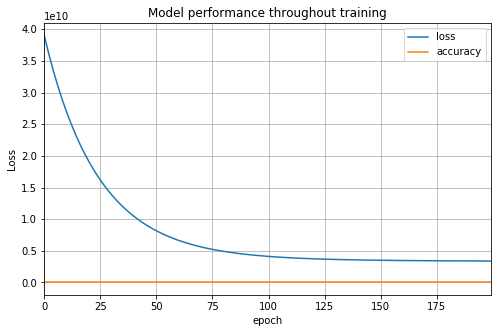

In [15]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
y_predict = model.predict(X_train)

In [25]:
evaluation = model.evaluate(y_predict, y_train, verbose=0)
print('loss', evaluation[0])
print('accuracy', evaluation[1])

ValueError: Error when checking input: expected input_1 to have shape (5,) but got array with shape (1,)